# Implementation
**Import libraries & dataset**
<br>First I would like to import some libraries needed and the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('car_evaluation.csv', header = None)
df.head()

0      1  2  3      4     5      6
0  vhigh  vhigh  2  2  small   low  unacc
1  vhigh  vhigh  2  2  small   med  unacc
2  vhigh  vhigh  2  2  small  high  unacc
3  vhigh  vhigh  2  2    med   low  unacc
4  vhigh  vhigh  2  2    med   med  unacc

**Rename columns & frequency distribution of values in variables**
<br>As you can see, the dataset does not have proper column names so we should give proper names to the columns for convenience.
<br>We will also check the frequency counts of categorical variables.

In [2]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',  'class']
df.columns = col_names
# df.head()

for col in col_names:
    print(df[col].value_counts())

high     432
vhigh    432
med      432
low      432
Name: buying, dtype: int64
high     432
vhigh    432
med      432
low      432
Name: maint, dtype: int64
5more    432
3        432
2        432
4        432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
big      576
med      576
Name: lug_boot, dtype: int64
high    576
med     576
low     576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


**Summary of variables**
- There are 7 variables in the dataset and all of them are categorical data types.
- The variables are buying, maint, doors, persons, lug_boot, safety and class.
- class is the target variable.

**Checking missing values in variables**
<br>We want to make sure that we will not deal with NULL values. In case there are NULL values, we can perform some techniques such as eliminating the row containing NULL values if the number of NULL values is small.

In [3]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

Luckily, our dataset does not have any missing values in each variable.

**Declare feature vector and target variable**
<br>In here, y contains only the target variable, which is class. X contains other variables

In [4]:
X = df.drop(['class'], axis=1)
y = df['class']

**Splitting data into separate training and test set**

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

**Feature engineering**
<br> Feature engineering is the process of using domain knowledge to extract features from raw data.
<br> First, because all the variables are ordinal categorical data type, we encode categorical variables with ordinal encoding.

In [6]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

X_train.head()

buying  maint  doors  persons  lug_boot  safety
48         1      1      1        1         1       1
468        2      1      1        2         2       1
155        1      2      1        1         2       2
1721       3      3      2        1         2       2
1208       4      3      3        1         2       2

In [7]:
X_test.head()

buying  maint  doors  persons  lug_boot  safety
599        2      2      4        3         1       2
1201       4      3      3        2         1       3
628        2      2      2        3         3       3
1498       3      2      2        2         1       3
1263       4      3      4        1         1       1

We have training and test set ready for model building now.

**Decision Tree Classifier model with criterion Gini Index**

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, random_state = 0)

clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)

print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8774


**Decision Tree visualization**

In [9]:
from sklearn import tree
import graphviz 

dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 
graph.render("gini.png")
graph 

**Random Forest Classifier model with parameter n_estimators = 10**

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(n_estimators = 10, random_state = 0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print('Model accuracy score with 10 decision trees: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision trees: 0.9247


Here, y_test is the real value of class labels and y_pred is the predicted value for class labels in the test set.

Now, I will perform the Random Forest Classifier model with default parameters, which is n_estimators = 100, to see its effect on accuracy.

**Random Forest Classifier model with default parameters**

In [11]:
rfc_100 = RandomForestClassifier(n_estimators = 100, random_state = 0)
rfc_100.fit(X_train, y_train)
y_pred_100 = rfc_100.predict(X_test)

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9457


The model accuracy score with 10 decision trees is 0.9247.
<br> The model accuracy score with 100 decision trees is 0.9457.
<br> As I expected, the more decision trees, the more accurate the model is.

**Random Forest model with important features**
<br> Until now, I have used all the features given in the model. Now I will select only the important features to build the model and see its effect on accuracy.
<br> At first, I will create the classifier and use the feature importance variable to see feature importance scores.

In [12]:
# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators = 100, random_state = 0)
clf.fit(X_train, y_train)

# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, index = X_train.columns).sort_values(ascending = False)
feature_scores

safety      0.295319
persons     0.233856
buying      0.151734
maint       0.146653
lug_boot    0.100048
doors       0.072389
dtype: float64

From the table above, we can conclude that safety is the most important feature whereas doors is the least one.

**Visualize feature scores of the features**
<br> In this section, I visualize the feature scores with matplotlib and seaborn.

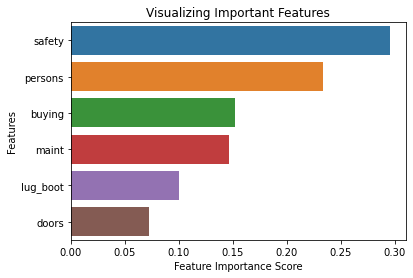

In [13]:
sns.barplot(x = feature_scores, y = feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

plt.title("Visualizing Important Features")
plt.show()

**Random Forest model on selected features**
<br> Because doors is the least important feature, I will drop it from the model and rebuild the model to see its effect on accuracy.
<br> We also perform splitting data into training and testing sets.

In [14]:
X = df.drop(['class', 'doors'], axis = 1)
y = df['class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

After that, I build the Random Forest model and check the accuracy.

In [15]:
encoder = ce.OrdinalEncoder(cols = ['buying', 'maint', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [16]:
clf = RandomForestClassifier(n_estimators = 10, random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with doors variable removed : 0.9264


The accuracy of the model without doors feature is 0.9264.
<br> The accuracy of the model with doors feature is 0.9247. (Both model with n_estimators = 10).
<br> We can conclude that the model accuracy has been improved with doors variable removed from the model.

We also perform removing the lug_boot variable, which is the second least important feature, along with doors to see the effects on accuracy.

In [17]:
X2 = df.drop(['class', 'doors', 'lug_boot'], axis = 1)
y2 = df['class']

from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.33, random_state = 42)

encoder = ce.OrdinalEncoder(cols = ['buying', 'maint', 'persons', 'safety'])

X2_train = encoder.fit_transform(X2_train)
X2_test = encoder.transform(X2_test)

clf = RandomForestClassifier(n_estimators = 10, random_state = 0)
clf.fit(X2_train, y2_train)
y2_pred = clf.predict(X2_test)

print('Model accuracy score with doors & lug_boot variable removed : {0:0.4f}'. format(accuracy_score(y2_test, y2_pred)))

Model accuracy score with doors & lug_boot variable removed : 0.8546


Clearly, if I remove lug_boot from the model with doors and rebuild the model, the accuracy decreases to 0.8546.
<br> So I will not drop it from the model.

**Conclusion**
<br> Based on the above analysis, we can say that our classification model accuracy is very good. It does great job in predicting the class labels.

# Evaluation
**Classification report**
<br> Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model.
<br> For a clear understanding, I have explained all of the metrics below so that you can easily understand the classification report of your machine learning model:
- Precision: the ratio of true positives to the sum of true and false positives
- Recall: the ratio of true positives to the sum of true and false negatives
- F1 score: the weighted harmonic mean of precision and recall. The closer the value of the F1 score is to 1.0, the better the expected performance of the model is.
- Support: the number of actual occurences of the class in the dataset. It diagnoses the performance evaluation process

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.89      0.83      0.86       129
        good       0.59      0.85      0.69        20
       unacc       0.98      0.97      0.98       397
       vgood       0.67      0.72      0.69        25

    accuracy                           0.93       571
   macro avg       0.78      0.84      0.81       571
weighted avg       0.93      0.93      0.93       571

